
Dataset:
We used the IMDb dataset, which contains movie reviews labeled as positive or negative. The dataset consists of 25,000 movie reviews for training and 25,000 for testing.


In [1]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
train_labels[0]

1

In [4]:
len(train_labels)

25000

In [5]:
len(train_labels)

25000

In [6]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [8]:
test_labels[0]

0

In [9]:
max([max(sequence) for sequence in test_data])

9999

Decoding Reviews to text

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Data preparation

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

Data Vectorization

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

Label Vectorization

In [16]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building model using relu and compiling it

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [19]:
seed(123)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
seed(123)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 53ms/step - loss: 0.5296 - accuracy: 0.7603 - val_loss: 0.4033 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3283 - accuracy: 0.8941 - val_loss: 0.3198 - val_accuracy: 0.8813
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2437 - accuracy: 0.9189 - val_loss: 0.2933 - val_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1985 - accuracy: 0.9347 - val_loss: 0.2880 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1649 - accuracy: 0.9469 - val_loss: 0.2787 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1372 - accuracy: 0.9566 - val_loss: 0.2873 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1165 - accuracy: 0.9650 - val_loss: 0.3016 - val_accuracy: 0.8824
Epoch 8/20
30

In the training set, there was a loss of 0.5371 and an accuracy of 0.7781, while on the validation set, there was a loss of 0.4241 and an accuracy of 0.8535.

As the training proceeded, the model's loss and accuracy on the training set increased, and by the conclusion of the 20th epoch, the model had a loss of 0.0175 and an accuracy of 0.9976. At the end of the 20th epoch on the validation set, the model had a loss of 0.5515 and an accuracy of 0.8684. The model overfits the training data set.

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

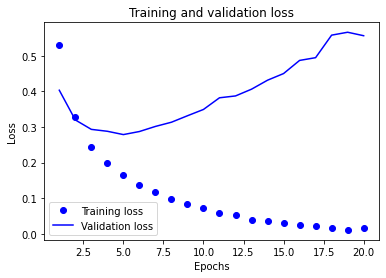

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

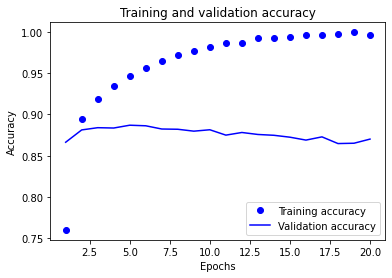

In [23]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 Further analysis, such as adjusting the model's hyperparameters or using regularization techniques, may be necessary to improve the model's performance.

Retraining the model

In [25]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 11ms/step - loss: 0.4788 - accuracy: 0.8110
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2819 - accuracy: 0.8992
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2203 - accuracy: 0.9195
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2829 - accuracy: 0.8874


In [26]:
results

[0.2828633487224579, 0.887440025806427]

accuracy of 88.84% on the test dataset. The loss value test is 0.2828.

In [28]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.23112297],
       [0.9997216 ],
       [0.8077589 ],
       ...,
       [0.13372439],
       [0.07866406],
       [0.5560529 ]], dtype=float32)

Building a neural network with 1 hidden layer

In [29]:
seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5078 - accuracy: 0.7895 - val_loss: 0.3995 - val_accuracy: 0.8651
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3339 - accuracy: 0.8970 - val_loss: 0.3402 - val_accuracy: 0.8707
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2653 - accuracy: 0.9145 - val_loss: 0.2977 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2248 - accuracy: 0.9281 - val_loss: 0.2891 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1965 - accuracy: 0.9381 - val_loss: 0.2775 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1732 - accuracy: 0.9458 - val_loss: 0.2782 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1563 - accuracy: 0.9513 - val_loss: 0.2765 - val_accuracy: 0.8866
Epoch 8/20
30

In [30]:
history_dict = history1.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

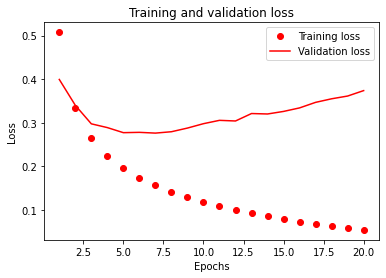

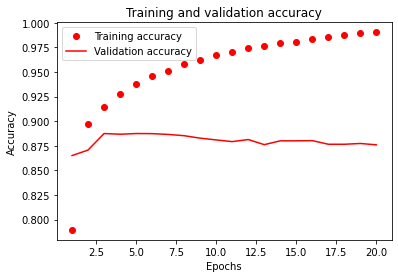

In [31]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
np.random.seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=5, batch_size=512)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 10ms/step - loss: 0.4523 - accuracy: 0.8175
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2835 - accuracy: 0.9038
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2280 - accuracy: 0.9209
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1993 - accuracy: 0.9313
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.2831 - accuracy: 0.8874


In [33]:
results1

[0.28314992785453796, 0.8873599767684937]

The loss on the test set is 0.2787, and the accuracy is 88.82%.



In [34]:
model1.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.2741467 ],
       [0.9998392 ],
       [0.894886  ],
       ...,
       [0.13997293],
       [0.11162095],
       [0.6388751 ]], dtype=float32)

Building a neural network with 3 hidden layers

In [35]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.5133 - accuracy: 0.7739 - val_loss: 0.3872 - val_accuracy: 0.8505
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2960 - accuracy: 0.8973 - val_loss: 0.3060 - val_accuracy: 0.8784
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2167 - accuracy: 0.9231 - val_loss: 0.2776 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1774 - accuracy: 0.9377 - val_loss: 0.2807 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1389 - accuracy: 0.9548 - val_loss: 0.3032 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1221 - accuracy: 0.9592 - val_loss: 0.3135 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1022 - accuracy: 0.9659 - val_loss: 0.3293 - val_accuracy: 0.8831
Epoch 8/20
30

In [36]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

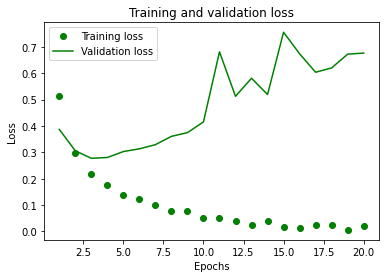

In [37]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

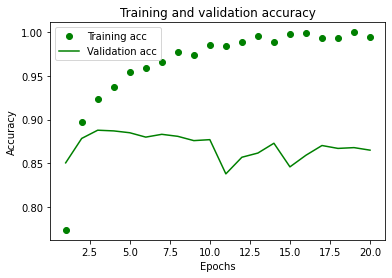

In [38]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=3, batch_size=512)
results_3 = model_3.evaluate(x_test, y_test)


Epoch 1/3
49/49 [==============================] - 2s 11ms/step - loss: 0.5401 - accuracy: 0.7943
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.3070 - accuracy: 0.8969
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.2899 - accuracy: 0.8842


The loss on the test set is 0.2839, and the accuracy is 88.66%.

In [40]:
results_3

[0.2899194657802582, 0.8841999769210815]

In [41]:
model_3.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.28286386],
       [0.99857616],
       [0.9557538 ],
       ...,
       [0.11666605],
       [0.13713366],
       [0.46826   ]], dtype=float32)

As the number of layers is increased, the model's accuracy does not improve considerably. Yet, the model with three layers is more accurate than the other two.

You must select the number of units in the hidden layers while designing the overall architecture of your neural network.

Despite the fact that these layers don't directly interact with the external world, they have a huge influence on the outcome.

Building Neural Network with 32 units.

In [42]:
np.random.seed(123)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.5062 - accuracy: 0.7734 - val_loss: 0.3663 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3043 - accuracy: 0.8922 - val_loss: 0.3207 - val_accuracy: 0.8712
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2266 - accuracy: 0.9214 - val_loss: 0.2763 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1875 - accuracy: 0.9356 - val_loss: 0.2754 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1611 - accuracy: 0.9427 - val_loss: 0.2832 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1234 - accuracy: 0.9595 - val_loss: 0.2995 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1096 - accuracy: 0.9637 - val_loss: 0.3426 - val_accuracy: 0.8741
Epoch 8/20
30

In [43]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

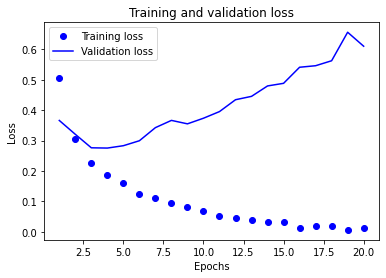

In [44]:
loss_values = history_dict32["loss"]
val_loss_values = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

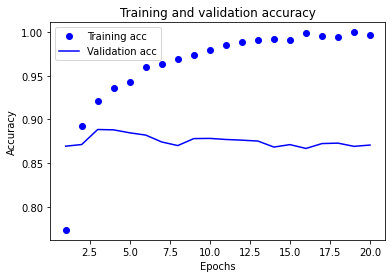

In [45]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=512)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1890 - accuracy: 0.9453
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1138 - accuracy: 0.9649
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.3929 - accuracy: 0.8675


[0.3929464519023895, 0.8675199747085571]

In [47]:
model_32.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.02338041],
       [0.9999982 ],
       [0.42686433],
       ...,
       [0.03139623],
       [0.01470361],
       [0.9400058 ]], dtype=float32)

The accuracy on the validation set is 86.48

Traing the model with 64 units

In [48]:
np.random.seed(123)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 50ms/step - loss: 0.5147 - accuracy: 0.7519 - val_loss: 0.3486 - val_accuracy: 0.8678
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3029 - accuracy: 0.8855 - val_loss: 0.3171 - val_accuracy: 0.8695
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2322 - accuracy: 0.9119 - val_loss: 0.3046 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1818 - accuracy: 0.9338 - val_loss: 0.3799 - val_accuracy: 0.8521
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1523 - accuracy: 0.9455 - val_loss: 0.2996 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1236 - accuracy: 0.9573 - val_loss: 0.3090 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1029 - accuracy: 0.9655 - val_loss: 0.3396 - val_accuracy: 0.8780
Epoch 8/20
30

In [49]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

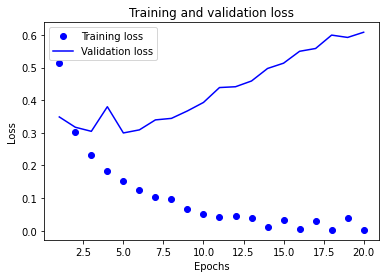

In [50]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

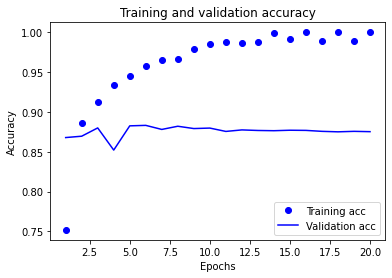

In [51]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [52]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=512)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1765 - accuracy: 0.9488
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1011 - accuracy: 0.9682
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.4188 - accuracy: 0.8667


[0.41878965497016907, 0.8666800260543823]

In [53]:
model_64.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.03154143],
       [0.999997  ],
       [0.5244306 ],
       ...,
       [0.06547123],
       [0.00958692],
       [0.9895941 ]], dtype=float32)

The accuracy on the validation set is 86.75%

Training the model with 128 units

In [54]:
np.random.seed(123)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history128 = model_128.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5140 - accuracy: 0.7533 - val_loss: 0.3572 - val_accuracy: 0.8592
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3051 - accuracy: 0.8793 - val_loss: 0.3397 - val_accuracy: 0.8542
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2389 - accuracy: 0.9055 - val_loss: 0.3004 - val_accuracy: 0.8756
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1764 - accuracy: 0.9343 - val_loss: 0.3055 - val_accuracy: 0.8801
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1524 - accuracy: 0.9419 - val_loss: 0.3262 - val_accuracy: 0.8784
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1354 - accuracy: 0.9495 - val_loss: 0.3027 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0895 - accuracy: 0.9709 - val_loss: 0.3251 - val_accuracy: 0.8829
Epoch 8/20
30

In [55]:
history_dict128 = history128.history
history_dict128.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

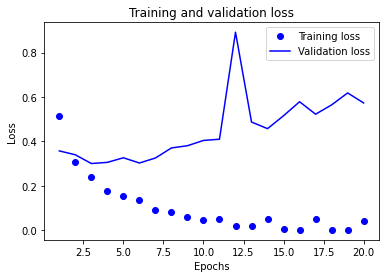

In [56]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

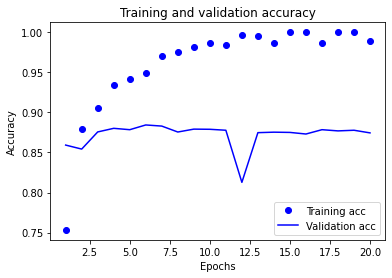

In [57]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [58]:
history_128 = model_128.fit(x_train, y_train, epochs=2, batch_size=512)
results_128 = model_128.evaluate(x_test, y_test)
results_128

Epoch 1/2
49/49 [==============================] - 1s 12ms/step - loss: 0.1608 - accuracy: 0.9486
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.3764 - accuracy: 0.8672


[0.3763897716999054, 0.8671600222587585]

In [59]:
model_128.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.01198501],
       [0.9999987 ],
       [0.4616034 ],
       ...,
       [0.02237444],
       [0.01089207],
       [0.48337194]], dtype=float32)

The accuracy on the validation set is 87.38%

MSE Loss Function

In [60]:
np.random.seed(123)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit
np.random.seed(123)
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.1826 - accuracy: 0.7668 - val_loss: 0.1333 - val_accuracy: 0.8549
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1066 - accuracy: 0.8859 - val_loss: 0.1005 - val_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0783 - accuracy: 0.9132 - val_loss: 0.0892 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0636 - accuracy: 0.9291 - val_loss: 0.0847 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0539 - accuracy: 0.9410 - val_loss: 0.0844 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0491 - accuracy: 0.9453 - val_loss: 0.0867 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0415 - accuracy: 0.9573 - val_loss: 0.0840 - val_accuracy: 0.8831
Epoch 8/20
30

In [61]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

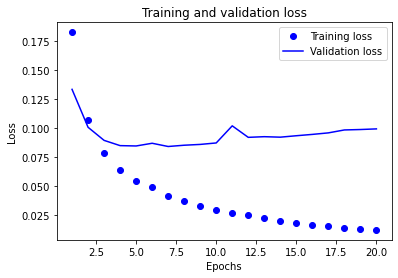

In [62]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

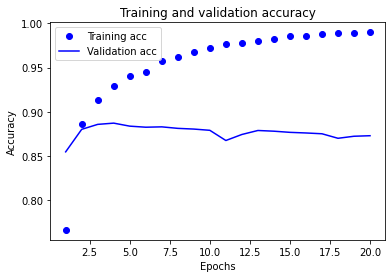

In [63]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [64]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0465 - accuracy: 0.9439
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0379 - accuracy: 0.9567
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0338 - accuracy: 0.9628
Epoch 4/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0293 - accuracy: 0.9690
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0273 - accuracy: 0.9718
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0254 - accuracy: 0.9739
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0239 - accuracy: 0.9759
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.1090 - accuracy: 0.8662


[0.10899879038333893, 0.8662400245666504]

In [65]:
model_MSE.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.01035187],
       [0.999995  ],
       [0.39185837],
       ...,
       [0.13339709],
       [0.01111287],
       [0.6622748 ]], dtype=float32)

Tanh Activation Function

In [66]:
np.random.seed(123)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123) 

history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 48ms/step - loss: 0.4903 - accuracy: 0.7827 - val_loss: 0.3626 - val_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2845 - accuracy: 0.9025 - val_loss: 0.2870 - val_accuracy: 0.8896
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2127 - accuracy: 0.9259 - val_loss: 0.2792 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1624 - accuracy: 0.9435 - val_loss: 0.2854 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1310 - accuracy: 0.9573 - val_loss: 0.2935 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1088 - accuracy: 0.9638 - val_loss: 0.3276 - val_accuracy: 0.8801
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0859 - accuracy: 0.9729 - val_loss: 0.3659 - val_accuracy: 0.8747
Epoch 8/20
30

In [67]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

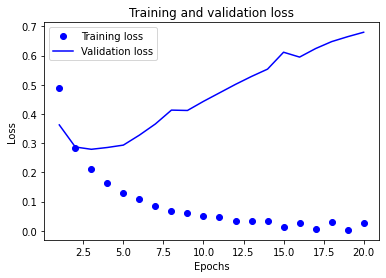

In [68]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

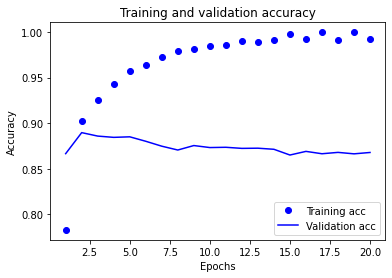

In [69]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [70]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2543 - accuracy: 0.9450
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1513 - accuracy: 0.9578
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1166 - accuracy: 0.9636
Epoch 4/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1025 - accuracy: 0.9677
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0908 - accuracy: 0.9708
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0778 - accuracy: 0.9762
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0680 - accuracy: 0.9784
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.5727 - accuracy: 0.8545


[0.5727108716964722, 0.8544800281524658]

Adam Optimizer Function

In [71]:

np.random.seed(123)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123) 

history_adam = model_adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.5475 - accuracy: 0.7605 - val_loss: 0.3965 - val_accuracy: 0.8618
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3015 - accuracy: 0.8995 - val_loss: 0.3004 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2089 - accuracy: 0.9335 - val_loss: 0.2768 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1604 - accuracy: 0.9495 - val_loss: 0.2786 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1259 - accuracy: 0.9626 - val_loss: 0.2890 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0999 - accuracy: 0.9734 - val_loss: 0.3035 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0792 - accuracy: 0.9822 - val_loss: 0.3298 - val_accuracy: 0.8786
Epoch 8/20
30

In [72]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

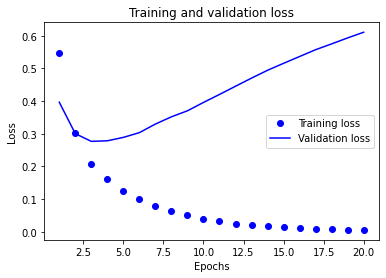

In [73]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

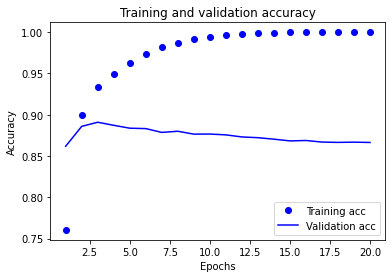

In [74]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
model_adam.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = model_adam.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2169 - accuracy: 0.9423
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1082 - accuracy: 0.9655
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0759 - accuracy: 0.9787
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.5037 - accuracy: 0.8574


[0.5037456750869751, 0.8574399948120117]

Regularization

In [76]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.5493 - accuracy: 0.7840 - val_loss: 0.4246 - val_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3548 - accuracy: 0.8986 - val_loss: 0.3535 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2838 - accuracy: 0.9227 - val_loss: 0.3295 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2386 - accuracy: 0.9390 - val_loss: 0.3961 - val_accuracy: 0.8579
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2185 - accuracy: 0.9438 - val_loss: 0.3405 - val_accuracy: 0.8801
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1997 - accuracy: 0.9515 - val_loss: 0.3333 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1898 - accuracy: 0.9549 - val_loss: 0.3404 - val_accuracy: 0.8852
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

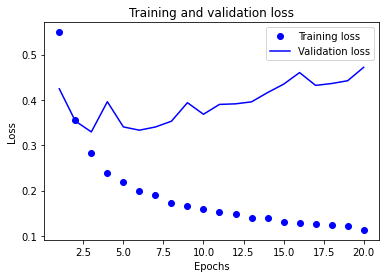

In [77]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

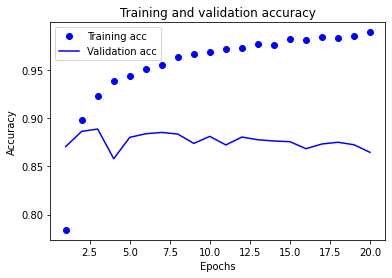

In [78]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
model_regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = model_regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2438 - accuracy: 0.9404
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1957 - accuracy: 0.9528
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1798 - accuracy: 0.9576
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1702 - accuracy: 0.9628
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1595 - accuracy: 0.9667
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1561 - accuracy: 0.9689
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1540 - accuracy: 0.9695
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.4565 - accuracy: 0.8683


[0.45647433400154114, 0.8682799935340881]

The loss on test set is 0.4255 and accuracy is 86.75%.

Dropout

In [80]:

from tensorflow.keras import regularizers
np.random.seed(123)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.6320 - accuracy: 0.6386 - val_loss: 0.5324 - val_accuracy: 0.8195
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5099 - accuracy: 0.7667 - val_loss: 0.4155 - val_accuracy: 0.8594
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4227 - accuracy: 0.8238 - val_loss: 0.3508 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3605 - accuracy: 0.8644 - val_loss: 0.3205 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3192 - accuracy: 0.8855 - val_loss: 0.2889 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2779 - accuracy: 0.9075 - val_loss: 0.2904 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2468 - accuracy: 0.9170 - val_loss: 0.2897 - val_accuracy: 0.8789
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

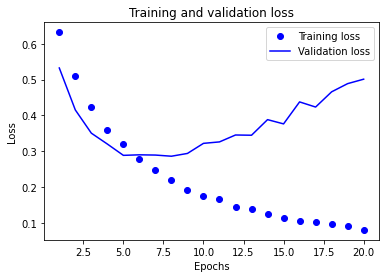

In [81]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

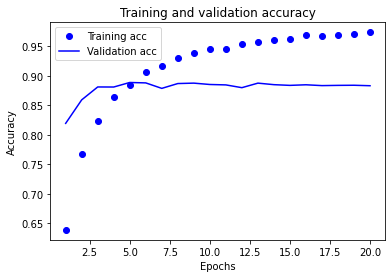

In [82]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [83]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2572 - accuracy: 0.9206
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.2169 - accuracy: 0.9323
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1935 - accuracy: 0.9381
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1697 - accuracy: 0.9433
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1626 - accuracy: 0.9466
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1490 - accuracy: 0.9478
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1421 - accuracy: 0.9502
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.5041 - accuracy: 0.8735


[0.5040906071662903, 0.873520016670227]

The loss on the test set is 0.4659 and accuracy is 0.8722.

Training model with hyper tuned parameters

In [84]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 3s 50ms/step - loss: 0.2483 - accuracy: 0.5943 - val_loss: 0.2166 - val_accuracy: 0.6709
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2072 - accuracy: 0.7724 - val_loss: 0.1802 - val_accuracy: 0.8204
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1744 - accuracy: 0.8492 - val_loss: 0.1582 - val_accuracy: 0.8700
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1518 - accuracy: 0.8794 - val_loss: 0.1412 - val_accuracy: 0.8756
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1300 - accuracy: 0.9015 - val_loss: 0.1298 - val_accuracy: 0.8717
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1123 - accuracy: 0.9149 - val_loss: 0.1183 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0974 - accuracy: 0.9238 - val_loss: 0.1116 - val_accuracy: 0.8839
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

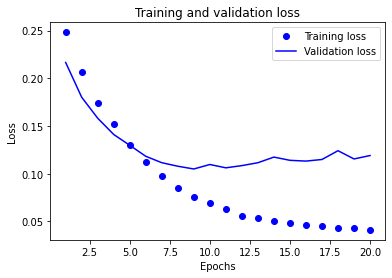

In [85]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

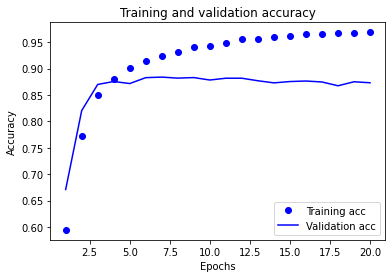

In [86]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [87]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0755 - accuracy: 0.9273
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0691 - accuracy: 0.9338
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0638 - accuracy: 0.9404
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0589 - accuracy: 0.9467
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0582 - accuracy: 0.9462
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0543 - accuracy: 0.9510
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0526 - accuracy: 0.9527
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.1144 - accuracy: 0.8771


[0.11436638981103897, 0.8770800232887268]

Summary

In [88]:
All_Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 432x288 with 0 Axes>

Compilation

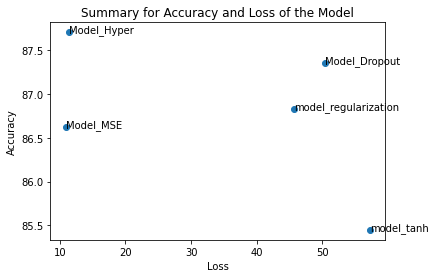

In [89]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

We began by importing the data and specifying the maximum number of words to be examined in each review as well as the maximum duration of each review. Then, we created a basic neural network model with one hidden layer of 16 units. For the hidden layer, we utilized binary crossentropy as the loss function and relu as the activation function.

We then investigated several ways for improving the model's performance. Then, we played around with the amount of hidden layers, creating models with one, two, and three hidden layers. Using the training and test datasets, we trained and assessed the models and compared the outcomes. We discovered that utilizing three hidden layers resulted in somewhat improved validation and test accuracy compared to using one hidden

Next, we experimented with layers that had more or fewer concealed units, especially 32, 64, and 128 units. We trained and tested the models with varying numbers of hidden units, plotting the validation accuracy for each model. We discovered that increasing the number of hidden units resulted in improved validation and test accuracy in general, but that increasing the number of hidden units too much might result in overfitting.

 We then attempted to replace binary crossentropy with the mse loss function. We used mse loss to train and assess the model, and then compared the results to the baseline model. We discovered that employing mse loss had no meaningful effect on the model's performance.